# Build CNN

## Loading image data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.layers import ZeroPadding2D, Dropout, Flatten, add, Reshape
from tensorflow.keras.layers import Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import plot_model,to_categorical
from tensorflow.keras import backend as K
from tensorflow.keras import initializers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from skimage.transform import resize
#import cv2

from PIL import Image
import os
from shutil import copyfile

In [2]:
os.getcwd()
#os.chdir('/Users/qingruan/Desktop/九章算法项目课件/')

'/groups/dats6501/carrieqing'

In [3]:
category_names = [
'agricultural',
    'airplane', 'baseballdiamond', 'beach', 
    'buildings', 'chaparral', 'denseresidential', 'forest', 
    'freeway', 'golfcourse', 'harbor', 'intersection', 
    'mediumresidential', 'mobilehomepark', 
    'overpass', 'parkinglot', 'river', 'runway', 
    'sparseresidential', 'storagetanks', 'tenniscourt'
]

In [4]:
num_images = 100  # per category
nb_classes = len(category_names)
patch_size = 256  # width and height in pixel
channels = 3

In [5]:
# Load the numpy datasets
images_orig = np.load('new data/UCMerced_images_orig_MultiClass21.npy')
labels_num = np.load('new data/UCMerced_labels_num_MultiClass21.npy')

# Convert labels to categorical 'one hot encoded vector' --> required format for softmax cross-entropy loss.
# Create an array of zeros with length nb_classes and put a 1 at the index of the true label.
labels = to_categorical(labels_num, nb_classes)

print('Orginal Labels: \n')
for i in range(1,(nb_classes)*100+1, 100):
    print(labels_num[i])

print('One-hot encoded Labels: \n')
for i in range(1,(nb_classes)*100+1, 100):
    print(labels[i])

print('\nImages shape: {}'.format(images_orig.shape))
print('\nLabel shape: {}'.format(labels.shape))

Orginal Labels: 

[0]
[1]
[2]
[3]
[4]
[5]
[6]
[7]
[8]
[9]
[10]
[11]
[12]
[13]
[14]
[15]
[16]
[17]
[18]
[19]
[20]
One-hot encoded Labels: 

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 

In [6]:
nb_images = images_orig.shape[0]
nb_images

2100

## Train/val/test Split

In [7]:
nb_images = images_orig.shape[0]
nb_images

2100

In [8]:
X_train, X_test, y_train, y_test = train_test_split(images_orig, labels, 
                                                    test_size=0.2, 
                                                    stratify = labels, 
                                                    random_state=2021)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                  test_size=0.25, 
                                                  stratify = y_train,
                                                  random_state=2021) 

# 0.25 x 0.8 = 0.2

In [9]:
print(X_train.shape,X_val.shape,X_test.shape,y_train.shape,y_val.shape,y_test.shape,)

(1260, 64, 64, 3) (420, 64, 64, 3) (420, 64, 64, 3) (1260, 21) (420, 21) (420, 21)


Check how many images per class in train/val/test

In [10]:
def unique_counts(arr):
    unique, counts = np.unique(arr, axis=0, return_counts=True)
    unique_num = [np.where(r==1)[0][0] for r in unique] 
    print(dict(zip(unique_num, counts)))

In [11]:
unique_counts(y_train)
unique_counts(y_val)
unique_counts(y_test)

{20: 60, 19: 60, 18: 60, 17: 60, 16: 60, 15: 60, 14: 60, 13: 60, 12: 60, 11: 60, 10: 60, 9: 60, 8: 60, 7: 60, 6: 60, 5: 60, 4: 60, 3: 60, 2: 60, 1: 60, 0: 60}
{20: 20, 19: 20, 18: 20, 17: 20, 16: 20, 15: 20, 14: 20, 13: 20, 12: 20, 11: 20, 10: 20, 9: 20, 8: 20, 7: 20, 6: 20, 5: 20, 4: 20, 3: 20, 2: 20, 1: 20, 0: 20}
{20: 20, 19: 20, 18: 20, 17: 20, 16: 20, 15: 20, 14: 20, 13: 20, 12: 20, 11: 20, 10: 20, 9: 20, 8: 20, 7: 20, 6: 20, 5: 20, 4: 20, 3: 20, 2: 20, 1: 20, 0: 20}


## Building basic CNN

### [1] Build architecture

conv1: 32*(3,3) filter, same padding, relu + maxpooling; conv2: 64*(3,3) filter, same padding, relu + maxpooling
dropout 0.5
softmax

In [12]:
# parameters:
input_shape = (64, 64, 3)
pool_size = (2, 2)                  # size of pooling area for max pooling
prob_drop_hidden = 0.5              # drop probability for dropout @ dense layer

def define_CNN_base():

    model = Sequential()

    # conv1 layer
    model.add(Conv2D(filters=64, 
                     kernel_size=(3,3),  
                     activation='relu', 
                     padding = 'same',
                     input_shape=input_shape))    
    model.add(MaxPooling2D(pool_size=pool_size, strides=(2, 2)))
    
    # conv2 layer
    model.add(Conv2D(filters=128, 
                     kernel_size=(3,3),  
                     activation='relu', 
                     padding = 'same',
                     input_shape=input_shape))    
    model.add(MaxPooling2D(pool_size=pool_size, strides=(2, 2)))

    # conv3 layer
    model.add(Conv2D(filters=256, 
                     kernel_size=(3,3),  
                     activation='relu', 
                     padding = 'same',
                   ))    
    model.add(MaxPooling2D(pool_size=pool_size, strides=(2, 2)))

    model.add(Flatten())

    # fc1 layer
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(rate=prob_drop_hidden))
    
    # fc2 layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(rate=prob_drop_hidden))

    # The output of the model (softmax)
    model.add(Dense(21, activation='softmax'))
    return model

# clear the session first, such that layer names start with index 1
K.clear_session()
model_CNN_base = define_CNN_base()

In [13]:
model_CNN_base.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0

### [2]Compile Model

In [14]:
# set your architecture
model = define_CNN_base()

In [15]:
# Define an optimizer
base_learning_rate=0.001

opt = Adam(lr=base_learning_rate)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])       

In [16]:
checkpoint_best_model = 'model/MultiClass_1Conv_1Conv_1Conv.hdf5'

# To monitor loss, mode min and set patience to 30 
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=300)
# Use path defined above, and save best only 
mc = ModelCheckpoint(checkpoint_best_model, monitor='val_accuracy', mode='max', verbose=1, 
                    save_best_only=True)

## Train Model

In [17]:
# Set hyper parameters
epochs = 1000
batch_size = 32
batches_per_epoch = y_train.shape[0]//batch_size
# the number of batches to see the full validation data:
validation_steps = y_val.shape[0]//batch_size

In [18]:
# Data Generator provided by keras to load the training data in batches
image_gen = ImageDataGenerator(
    zoom_range = 0.1,
    width_shift_range=5,   # pixel
    height_shift_range=5,  # pixel
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20)

# At Test/Validation time without data augmentation
image_gen_test = ImageDataGenerator()

train_gen = image_gen.flow(np.array(X_train),
                           y_train,
                           batch_size = batch_size,
                           shuffle = True)
val_gen = image_gen_test.flow(np.array(X_val),
                              y_val,
                              batch_size = batch_size,
                              shuffle = True)

In [19]:
X_train.shape,X_val.shape,y_train.shape,y_val.shape

((1260, 64, 64, 3), (420, 64, 64, 3), (1260, 21), (420, 21))

Training commences by making a call to the fit method with our training and validation sets

In [20]:
# Fit the model parameters
print('training...')

history = model.fit(
                x=train_gen,
                steps_per_epoch=batches_per_epoch, 
                epochs=epochs, 
                validation_data=val_gen,
                validation_steps=validation_steps,
                callbacks=[es, mc],
                verbose = 2,
                )

print('done')

training...
Epoch 1/1000
39/39 - 5s - loss: 3.0535 - accuracy: 0.0391 - val_loss: 3.0419 - val_accuracy: 0.0673

Epoch 00001: val_accuracy improved from -inf to 0.06731, saving model to model/MultiClass_1Conv_1Conv_1Conv.hdf5
Epoch 2/1000
39/39 - 4s - loss: 3.0197 - accuracy: 0.0440 - val_loss: 2.9189 - val_accuracy: 0.0649

Epoch 00002: val_accuracy did not improve from 0.06731
Epoch 3/1000
39/39 - 3s - loss: 2.9754 - accuracy: 0.0651 - val_loss: 2.8508 - val_accuracy: 0.1106

Epoch 00003: val_accuracy improved from 0.06731 to 0.11058, saving model to model/MultiClass_1Conv_1Conv_1Conv.hdf5
Epoch 4/1000
39/39 - 3s - loss: 2.8973 - accuracy: 0.0725 - val_loss: 2.8465 - val_accuracy: 0.1442

Epoch 00004: val_accuracy improved from 0.11058 to 0.14423, saving model to model/MultiClass_1Conv_1Conv_1Conv.hdf5
Epoch 5/1000
39/39 - 3s - loss: 2.8537 - accuracy: 0.1083 - val_loss: 2.7474 - val_accuracy: 0.1442

Epoch 00005: val_accuracy did not improve from 0.14423
Epoch 6/1000
39/39 - 4s - lo


Epoch 00046: val_accuracy did not improve from 0.72356
Epoch 47/1000
39/39 - 6s - loss: 0.9900 - accuracy: 0.6702 - val_loss: 1.0648 - val_accuracy: 0.6827

Epoch 00047: val_accuracy did not improve from 0.72356
Epoch 48/1000
39/39 - 7s - loss: 0.9558 - accuracy: 0.6678 - val_loss: 0.9035 - val_accuracy: 0.7139

Epoch 00048: val_accuracy did not improve from 0.72356
Epoch 49/1000
39/39 - 7s - loss: 0.9625 - accuracy: 0.6930 - val_loss: 0.9264 - val_accuracy: 0.7115

Epoch 00049: val_accuracy did not improve from 0.72356
Epoch 50/1000
39/39 - 6s - loss: 0.9313 - accuracy: 0.6987 - val_loss: 0.8434 - val_accuracy: 0.7236

Epoch 00050: val_accuracy did not improve from 0.72356
Epoch 51/1000
39/39 - 7s - loss: 0.9894 - accuracy: 0.6686 - val_loss: 0.7671 - val_accuracy: 0.7548

Epoch 00051: val_accuracy improved from 0.72356 to 0.75481, saving model to model/MultiClass_1Conv_1Conv_1Conv.hdf5
Epoch 52/1000
39/39 - 7s - loss: 0.9220 - accuracy: 0.6946 - val_loss: 0.9275 - val_accuracy: 0.71

39/39 - 9s - loss: 0.6201 - accuracy: 0.7940 - val_loss: 0.5736 - val_accuracy: 0.8269

Epoch 00096: val_accuracy improved from 0.80529 to 0.82692, saving model to model/MultiClass_1Conv_1Conv_1Conv.hdf5
Epoch 97/1000
39/39 - 9s - loss: 0.4972 - accuracy: 0.8331 - val_loss: 0.8344 - val_accuracy: 0.7692

Epoch 00097: val_accuracy did not improve from 0.82692
Epoch 98/1000
39/39 - 9s - loss: 0.5348 - accuracy: 0.8168 - val_loss: 0.7097 - val_accuracy: 0.8125

Epoch 00098: val_accuracy did not improve from 0.82692
Epoch 99/1000
39/39 - 9s - loss: 0.5493 - accuracy: 0.8160 - val_loss: 0.7195 - val_accuracy: 0.7981

Epoch 00099: val_accuracy did not improve from 0.82692
Epoch 100/1000
39/39 - 9s - loss: 0.5624 - accuracy: 0.8086 - val_loss: 0.8621 - val_accuracy: 0.7572

Epoch 00100: val_accuracy did not improve from 0.82692
Epoch 101/1000
39/39 - 9s - loss: 0.5088 - accuracy: 0.8347 - val_loss: 0.7244 - val_accuracy: 0.7933

Epoch 00101: val_accuracy did not improve from 0.82692
Epoch 102


Epoch 00146: val_accuracy did not improve from 0.84615
Epoch 147/1000
39/39 - 10s - loss: 0.3546 - accuracy: 0.8836 - val_loss: 0.9025 - val_accuracy: 0.7909

Epoch 00147: val_accuracy did not improve from 0.84615
Epoch 148/1000
39/39 - 9s - loss: 0.3950 - accuracy: 0.8738 - val_loss: 0.7687 - val_accuracy: 0.8149

Epoch 00148: val_accuracy did not improve from 0.84615
Epoch 149/1000
39/39 - 9s - loss: 0.3120 - accuracy: 0.8844 - val_loss: 1.0004 - val_accuracy: 0.8101

Epoch 00149: val_accuracy did not improve from 0.84615
Epoch 150/1000
39/39 - 9s - loss: 0.4322 - accuracy: 0.8616 - val_loss: 0.8096 - val_accuracy: 0.8029

Epoch 00150: val_accuracy did not improve from 0.84615
Epoch 151/1000
39/39 - 9s - loss: 0.4674 - accuracy: 0.8542 - val_loss: 0.8436 - val_accuracy: 0.7788

Epoch 00151: val_accuracy did not improve from 0.84615
Epoch 152/1000
39/39 - 9s - loss: 0.3828 - accuracy: 0.8673 - val_loss: 0.7308 - val_accuracy: 0.8125

Epoch 00152: val_accuracy did not improve from 0.8

39/39 - 10s - loss: 0.2323 - accuracy: 0.9251 - val_loss: 0.8585 - val_accuracy: 0.8269

Epoch 00198: val_accuracy did not improve from 0.85817
Epoch 199/1000
39/39 - 9s - loss: 0.2698 - accuracy: 0.9243 - val_loss: 0.6613 - val_accuracy: 0.8510

Epoch 00199: val_accuracy did not improve from 0.85817
Epoch 200/1000
39/39 - 9s - loss: 0.2315 - accuracy: 0.9235 - val_loss: 0.9419 - val_accuracy: 0.8101

Epoch 00200: val_accuracy did not improve from 0.85817
Epoch 201/1000
39/39 - 10s - loss: 0.2551 - accuracy: 0.9161 - val_loss: 0.8370 - val_accuracy: 0.7933

Epoch 00201: val_accuracy did not improve from 0.85817
Epoch 202/1000
39/39 - 9s - loss: 0.2279 - accuracy: 0.9267 - val_loss: 0.7677 - val_accuracy: 0.8101

Epoch 00202: val_accuracy did not improve from 0.85817
Epoch 203/1000
39/39 - 9s - loss: 0.2075 - accuracy: 0.9332 - val_loss: 0.8929 - val_accuracy: 0.8269

Epoch 00203: val_accuracy did not improve from 0.85817
Epoch 204/1000
39/39 - 9s - loss: 0.2821 - accuracy: 0.9137 - val

39/39 - 9s - loss: 0.2688 - accuracy: 0.9202 - val_loss: 0.9577 - val_accuracy: 0.8053

Epoch 00250: val_accuracy did not improve from 0.85817
Epoch 251/1000
39/39 - 9s - loss: 0.1908 - accuracy: 0.9389 - val_loss: 1.0568 - val_accuracy: 0.8173

Epoch 00251: val_accuracy did not improve from 0.85817
Epoch 252/1000
39/39 - 9s - loss: 0.2087 - accuracy: 0.9316 - val_loss: 0.8304 - val_accuracy: 0.8413

Epoch 00252: val_accuracy did not improve from 0.85817
Epoch 253/1000
39/39 - 9s - loss: 0.2113 - accuracy: 0.9397 - val_loss: 0.8300 - val_accuracy: 0.8365

Epoch 00253: val_accuracy did not improve from 0.85817
Epoch 254/1000
39/39 - 9s - loss: 0.1932 - accuracy: 0.9414 - val_loss: 0.9937 - val_accuracy: 0.8221

Epoch 00254: val_accuracy did not improve from 0.85817
Epoch 255/1000
39/39 - 9s - loss: 0.2275 - accuracy: 0.9316 - val_loss: 0.9348 - val_accuracy: 0.8293

Epoch 00255: val_accuracy did not improve from 0.85817
Epoch 256/1000
39/39 - 9s - loss: 0.2559 - accuracy: 0.9300 - val_l

39/39 - 9s - loss: 0.2359 - accuracy: 0.9283 - val_loss: 0.8393 - val_accuracy: 0.8341

Epoch 00302: val_accuracy did not improve from 0.85817
Epoch 303/1000
39/39 - 9s - loss: 0.1393 - accuracy: 0.9568 - val_loss: 1.0010 - val_accuracy: 0.8413

Epoch 00303: val_accuracy did not improve from 0.85817
Epoch 304/1000
39/39 - 9s - loss: 0.1398 - accuracy: 0.9552 - val_loss: 1.0174 - val_accuracy: 0.8365

Epoch 00304: val_accuracy did not improve from 0.85817
Epoch 305/1000
39/39 - 10s - loss: 0.1597 - accuracy: 0.9471 - val_loss: 0.9137 - val_accuracy: 0.8558

Epoch 00305: val_accuracy did not improve from 0.85817
Epoch 306/1000
39/39 - 9s - loss: 0.1489 - accuracy: 0.9487 - val_loss: 1.1672 - val_accuracy: 0.8029

Epoch 00306: val_accuracy did not improve from 0.85817
Epoch 307/1000
39/39 - 9s - loss: 0.1924 - accuracy: 0.9414 - val_loss: 0.8261 - val_accuracy: 0.8630

Epoch 00307: val_accuracy improved from 0.85817 to 0.86298, saving model to model/MultiClass_1Conv_1Conv_1Conv.hdf5
Epoch


Epoch 00353: val_accuracy did not improve from 0.86298
Epoch 354/1000
39/39 - 9s - loss: 0.1902 - accuracy: 0.9365 - val_loss: 0.8422 - val_accuracy: 0.8462

Epoch 00354: val_accuracy did not improve from 0.86298
Epoch 355/1000
39/39 - 9s - loss: 0.1571 - accuracy: 0.9503 - val_loss: 0.8839 - val_accuracy: 0.8317

Epoch 00355: val_accuracy did not improve from 0.86298
Epoch 356/1000
39/39 - 9s - loss: 0.1602 - accuracy: 0.9463 - val_loss: 0.9350 - val_accuracy: 0.8317

Epoch 00356: val_accuracy did not improve from 0.86298
Epoch 357/1000
39/39 - 9s - loss: 0.1844 - accuracy: 0.9446 - val_loss: 0.9212 - val_accuracy: 0.8438

Epoch 00357: val_accuracy did not improve from 0.86298
Epoch 358/1000
39/39 - 10s - loss: 0.2224 - accuracy: 0.9308 - val_loss: 0.8470 - val_accuracy: 0.8462

Epoch 00358: val_accuracy did not improve from 0.86298
Epoch 359/1000
39/39 - 9s - loss: 0.1927 - accuracy: 0.9381 - val_loss: 1.0059 - val_accuracy: 0.8365

Epoch 00359: val_accuracy did not improve from 0.8


Epoch 00405: val_accuracy did not improve from 0.86298
Epoch 406/1000
39/39 - 10s - loss: 0.1520 - accuracy: 0.9528 - val_loss: 1.1170 - val_accuracy: 0.8413

Epoch 00406: val_accuracy did not improve from 0.86298
Epoch 407/1000
39/39 - 9s - loss: 0.1619 - accuracy: 0.9520 - val_loss: 0.9375 - val_accuracy: 0.8438

Epoch 00407: val_accuracy did not improve from 0.86298
Epoch 408/1000
39/39 - 9s - loss: 0.1877 - accuracy: 0.9463 - val_loss: 1.1839 - val_accuracy: 0.8101

Epoch 00408: val_accuracy did not improve from 0.86298
Epoch 409/1000
39/39 - 9s - loss: 0.2896 - accuracy: 0.9275 - val_loss: 0.8513 - val_accuracy: 0.8413

Epoch 00409: val_accuracy did not improve from 0.86298
Epoch 410/1000
39/39 - 9s - loss: 0.1626 - accuracy: 0.9471 - val_loss: 0.9527 - val_accuracy: 0.8413

Epoch 00410: val_accuracy did not improve from 0.86298
Epoch 411/1000
39/39 - 9s - loss: 0.1479 - accuracy: 0.9560 - val_loss: 1.1137 - val_accuracy: 0.8125

Epoch 00411: val_accuracy did not improve from 0.8

Plotting training accuracy/loss curves

In [21]:
def history_plot(model_id, history):
	plt.figure(figsize=(8,10)) 
	# plot loss
	plt.subplot(2, 1, 1)
	plt.title('Cross Entropy Loss - ' + model_id, fontsize = 12)
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='val')
	plt.xlabel("Epochs",fontsize = 12)
	plt.ylabel("Loss", fontsize = 12)
	plt.legend(loc='upper right')

	# plot accuracy
	plt.subplot(2, 1, 2)
	plt.title('Classification Accuracy ' + model_id, fontsize = 10)
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='val')
	plt.xlabel("Epochs", fontsize = 12)
	plt.ylabel("Accuracy", fontsize = 12)
	plt.legend(loc='lower right')

	plt.show()

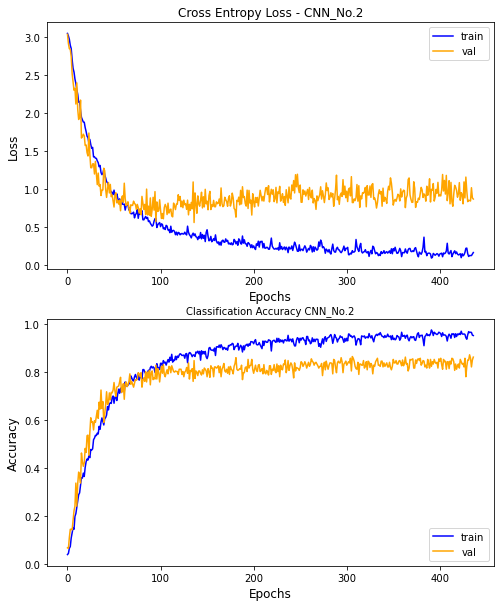

In [22]:
history_plot('CNN_No.2', history)

#### Saving our model to disk

A Keras model consists of multiple components:

+ An architecture, or configuration, which specifies what layers the model contain, and how they're connected.
+ A set of weights values (the "state of the model").
+ An optimizer (defined by compiling the model).
+ A set of losses and metrics (defined by compiling the model or calling add_loss() or add_metric()).
The Keras API makes it possible to save all of these pieces to disk at once, or to only selectively save some of them:

+ Saving everything into a single archive in the TensorFlow SavedModel format (or in the older Keras H5 format). This is the standard practice.
+ Saving the architecture / configuration only, typically as a JSON file.
+ Saving the weights values only. This is generally used when training the model.

In [23]:
saved_model = load_model(checkpoint_best_model)

from datetime import datetime
DTime = datetime.now().strftime('%Y%m%d_%H%M%S')

_, acc = saved_model.evaluate(X_train, y_train, verbose=0)
print('Model evaluate on train, Accuracy %.3f' % (acc * 100.0))
_, acc = saved_model.evaluate(X_val, y_val, verbose=0)
print('Model evaluate on val, Accuracy %.3f' % (acc * 100.0))
_, acc = saved_model.evaluate(X_test, y_test, verbose=0)
print('Model evaluate on test, Accuracy %.3f' % (acc * 100.0))
acc_test = round(100*acc,2)

save_file = checkpoint_best_model[0:-5] +'_' + DTime + '_ACC' + str(acc_test)+'.h5'
print("Model saved: ", save_file)
saved_model.save(save_file,  save_format="h5")

Model evaluate on train, Accuracy 99.841
Model evaluate on val, Accuracy 87.143
Model evaluate on test, Accuracy 84.286
Model saved:  model/MultiClass_1Conv_1Conv_1Conv_20210227_010118_ACC84.29.h5


### Predict test data